In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import pandas as pd
import torch
import torchaudio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
train_csv=pd.read_csv('/kaggle/input/birdclef-2022/train_metadata.csv')
train_csv.head()



In [ ]:
base_dir = '../input/birdclef-2022/train_audio'

akiapo=base_dir+ '/' +train_csv[train_csv['primary_label'] == "akiapo"].sample(1, random_state = 33)['filename'].values[0]
aniani=base_dir+ '/' +train_csv[train_csv['primary_label'] == "aniani"].sample(1, random_state = 33)['filename'].values[0]
apapan=base_dir+ '/' +train_csv[train_csv['primary_label'] == "apapan"].sample(1, random_state = 33)['filename'].values[0]
barpet=base_dir+ '/' +train_csv[train_csv['primary_label'] == "barpet"].sample(1, random_state = 33)['filename'].values[0]
skylar=base_dir+ '/' +train_csv[train_csv['primary_label'] == "skylar"].sample(1, random_state = 33)['filename'].values[0]
houfin=base_dir+ '/' +train_csv[train_csv['primary_label'] == "houfin"].sample(1, random_state = 33)['filename'].values[0]
birds= ["akiapo", "aniani", "apapan", "barpet", "skylar",'houfin']

In [ ]:
ipd.Audio(akiapo)


In [ ]:
ipd.Audio(aniani)


In [ ]:
ipd.Audio(apapan)


In [ ]:
ipd.Audio(barpet)


In [ ]:
ipd.Audio(skylar)


In [ ]:
ipd.Audio(houfin)


# Loading and Visualizing an audio file:
* librosa.load: loads an audio file as a floating point time series and gives it's native sampling rate.
* The sampling frequency (or sample rate) is the number of samples (data points) per second in an audio.
* We can check the audio length by dividing the total number of data points by the sampling frequency.


In [ ]:
y, sr = librosa.load(akiapo)
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', np.shape(y)[0]/sr)

In [ ]:
y, sr = librosa.load(aniani)
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', np.shape(y)[0]/sr)

In [ ]:
y_akiapo, sr_akiapo = librosa.load(akiapo)
# audio_astfly, _ = librosa.effects.trim(y_astfly)

y_aniani, sr_aniani = librosa.load(aniani)
# audio_casvir, _ = librosa.effects.trim(y_casvir)

y_apapan, sr_apapan = librosa.load(apapan)
# audio_subfly, _ = librosa.effects.trim(y_subfly)

y_barpet, sr_barpet = librosa.load(barpet)
# audio_wilfly, _ = librosa.effects.trim(y_wilfly)

y_skylar, sr_skylar = librosa.load(skylar)
# audio_verdin, _ = librosa.effects.trim(y_verdin)

y_houfin, sr_houfin = librosa.load(houfin)
# audio_solsan, _ = librosa.effects.trim(y_solsan)

<a id='sec1'></a>
<h1 style = "font-size:50px;font-family: Comic Sans MS;text-align: center">1.Time Domain Features</h1>

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">Waveform Visualization</h1>

<h4 style="Comic Sans MS">To visualize the sampled signal and plot it, we need two Python libraries—Matplotlib and Librosa. The following code depicts the waveform visualization of the amplitude vs the time representation of the 6 signals.</h4>

In [ ]:
fig, ax = plt.subplots(6, figsize = (16, 12))
fig.suptitle('Sound Waves', fontsize=16)

librosa.display.waveshow(y = y_akiapo, sr = sr_akiapo, color = "#A300F9", ax=ax[0])
librosa.display.waveshow(y = y_aniani, sr = sr_aniani, color = "#4300FF", ax=ax[1])
librosa.display.waveshow(y = y_apapan, sr = sr_apapan, color = "#009DFF", ax=ax[2])
librosa.display.waveshow(y = y_barpet, sr = sr_barpet, color = "#00FFB0", ax=ax[3])
librosa.display.waveshow(y = y_skylar, sr = sr_skylar, color = "#D9FF00", ax=ax[4])
librosa.display.waveshow(y = y_houfin, sr = sr_houfin, color = "r", ax=ax[5]);

for i, name in zip(range(6), birds):
    ax[i].set_ylabel(name, fontsize=13)

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">ZERO CROSSING RATE(ZCR)</h1>

<h4 style="Comic Sans MS">The ZCR of an audio signal is defined as the rate at which the signal changes sign. ZCR is an efficient and simple way to detecting whether a speech frame is voice, unvoiced, or silent. It is expected that unvoiced segments produce higher ZCRs than for voice segments, and ideally ZCRs equal to zero for silence segments  
</h4>

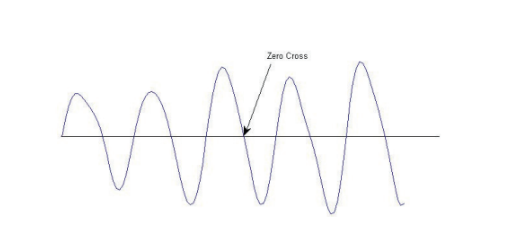

In [ ]:
# Total zero_crossings in our 1 song
zero_astfly = librosa.zero_crossings(y_akiapo, pad=False)
zero_casvir = librosa.zero_crossings(y_aniani, pad=False)
zero_wilfly = librosa.zero_crossings(y_apapan, pad=False)
zero_subfly = librosa.zero_crossings(y_barpet, pad=False)
zero_verdin = librosa.zero_crossings(y_skylar, pad=False)
zero_solsan = librosa.zero_crossings(y_houfin, pad=False)
zero_birds_list = [zero_astfly, zero_casvir, zero_wilfly, zero_subfly, zero_verdin,zero_solsan]

for bird, name in zip(zero_birds_list, birds):
    print("{} change rate is {:,}".format(name, sum(bird)))

<a id='sec3'></a>
<h1 style = "font-size:50px;font-family: Comic Sans MS;text-align: center">Spectrum Related Features</h1>

<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">SPECTRAL CENTROIDS</h1>

<h4 style="Comic Sans MS">The spectral centroid is a measure to characterize the "center of mass" of a given spectrum.The spectral centroid is calculated as the weighted means of the frequencies present in a given signal, determined using a Fourier transform, with the frequency magnitudes as the weights.Here S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.


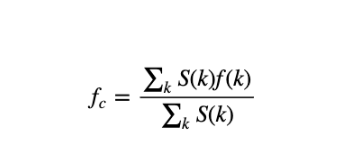

In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y_akiapo, sr=sr_akiapo)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y_akiapo, sr=sr_akiapo, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_centroids), color='#FFB100', lw=2)
plt.legend(["Spectral Centroid", "Wave"])
plt.title("Spectral Centroid: akiapo Bird", fontsize=16);


<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">SPECTRAL CONTRAST</h1>

<h4 style="Comic Sans MS">The difference between spectral peaks and spectral valleys will reflect the spectral contrast distribution.<br>Spectral peaks correspond to harmonic components and Spectral valleys correspond to non-harmonic components or noise in a music piece.It considers the spectral peak and valley in each sub-band separately.


In [ ]:
contrast = librosa.feature.spectral_contrast(y=y_akiapo,sr=sr_akiapo)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')


<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">SPECTRAL ROLLOFF</h1>

<h4 style="Comic Sans MS">Spectral rolloff point is defined as the Nth percentile frequency of the power spectral distribution, where  is usually 85% or 95%. The rolloff point is the frequency below which the N% of the magnitude distribution is concentrated. In other words,the rolloff frequency is defined as the frequency under which the cutoff of the total energy of the spectrum is contained, eg. 85%. It can be used to distinguish between harmonic and noisy sounds.

In [ ]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y_akiapo, sr=sr_akiapo)[0]

# Computing the time variable for visualization
frames = range(len(spectral_rolloff))
# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y_akiapo, sr=sr_akiapo, alpha=0.4, color = '#A300F9', lw=3)
plt.plot(t, normalize(spectral_rolloff), color='#FFB100', lw=3)
plt.legend(["Spectral Rolloff", "Wave"])
plt.title("Spectral Rolloff: akiapo Bird", fontsize=16);




<h1 style = "font-size:40px;font-family: Comic Sans MS;text-align: center;background-color:#800080;color:#FFFFFF">Mel-frequency cepstral coefficients (MFCCs)</h1>

<h4 style="Comic Sans MS">One popular audio feature extraction method is the Mel-frequency cepstral coefficients (MFCC), which has 39 features. The feature count is small enough to force the model to learn the information of the audio. 12 parameters are related to the amplitude of frequencies. It models the characteristics of the human voice. The extraction flow of MFCC features is depicted below:

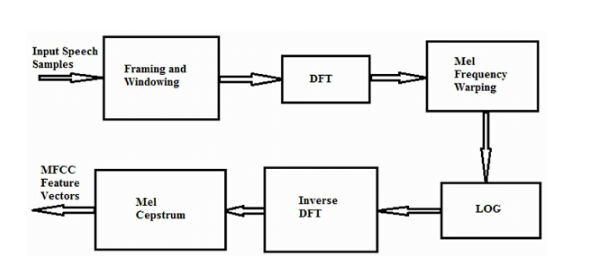

<h4 style="Comic Sans MS">This feature is one of the most important method to extract a feature of an audio signal and is used majorly whenever working on audio signals. The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.<br><br>By printing the shape of mfccs you get how many mfccs are calculated on how many frames. The first value represents the number of mfccs calculated and another value represents a number of frames available.


In [ ]:
mfcc=librosa.feature.mfcc(y=y_akiapo, sr=sr_akiapo)
fig, ax = plt.subplots(1,figsize = (12, 6))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
print(mfcc.shape)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')